# importing necessary libraries

In [295]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob
from textblob import Word
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [328]:

from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cnctk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cnctk\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# File importing in pandas DataFrame and data arrangement

In [297]:
# data import from excel file
data = pd.read_excel(r"C:\Users\cnctk\OneDrive\Desktop\project\voo 2\Data.xlsx",dtype =str )
df = pd.DataFrame(data)
df.shape

(6934, 6)

In [298]:
# Removing duplicates
df.drop_duplicates(keep='first',inplace = True)
print(df.shape)


(6894, 6)


In [299]:
# saving cancelled orders
cancelled_orders = df.loc[df['Order Status']=='CANCELLED']
print(cancelled_orders.shape)

(150, 6)


In [300]:
# dropping the cancelled order
df.drop(df[df['Order Status'] == 'CANCELLED'].index, inplace = True)

print(df.shape)

(6744, 6)


In [301]:
# Removing Blank entries
df = df.dropna()
print(df.shape)

(231, 6)


In [302]:
print(df)

          Order Id Order Status                                 Item Name  \
18     10701530888    DELIVERED         Homely Dal Tadka Thali with Sweet   
19     10701530888    DELIVERED      Dal Tadka Rice Bowl with Butter Milk   
33    106989449753    DELIVERED    Homely Chicken Masala Thali with Sweet   
49    106762961007    DELIVERED     Homely Bhindi Masala Thali with Sweet   
50    106762961007    DELIVERED                       Butter Milk(300 ml)   
...            ...          ...                                       ...   
6597  107269473678    DELIVERED  2 Aloo Onion Paratha, Curd & Pickle Meal   
6598  107269473678    DELIVERED                             Bhindi Masala   
6715  107276758050    DELIVERED            Set of Chapatis (4 - Chapatis)   
6716  107276758050    DELIVERED                             Bhindi Masala   
6864  108040595774    DELIVERED                       Veg & Cheese Panini   

     Item Quantity      Rating  \
18               1  1 VERY BAD   
19     

# Cleaning Data Using NLTK

In [303]:
# Extracting Dataset for label using ratings
data_r = pd.DataFrame(df['Feedback'])
data_r['rating'] = df['Rating']
data_r.drop_duplicates(keep='first',inplace = True)
#dara

print(data_r.shape)

(145, 2)


In [304]:
# Getting rating(1-5) from rating column
def getIntegers(string):
        for x in string.split():
             if x.isnumeric():
                if int(x)<3:
                    return 0
                if int(x)>=3:
                    return 1
               

data_r['label'] = df['Rating'].apply(getIntegers)


In [305]:
data_r

,Feedback,rating,label
18,I don't think it's delivery guy fault but pack...,1 VERY BAD,0
33,I liked the quantity of the food and the taste.,5 LOVED IT,1
49,"Bhindi was very raw, butter milk had a foul smell",2 BAD,0
75,One of the 3rd class restaurant. I ordered Egg...,1 VERY BAD,0
107,Chicken bowl had only two pieces of chicken,2 BAD,0
...,...,...,...
6487,Spicy and Tasty....??,5 LOVED IT,1
6571,Paratas wer made of maida.. With spicy green c...,1 VERY BAD,0
6597,"No sweet delivered, paratha was maida tandoori...",3 AVERAGE,1
6715,Not given adequate quantity of dish as said it...,3 AVERAGE,1


In [306]:
# Data Cleaning removing unwanted data
def unwanted(t):
    t = re.sub('[^A-Za-z]+', ' ', t)
    return t

data_r['cleaned'] = data_r['Feedback'].apply(unwanted)

In [307]:
data_r

,Feedback,rating,label,cleaned
18,I don't think it's delivery guy fault but pack...,1 VERY BAD,0,I don t think it s delivery guy fault but pack...
33,I liked the quantity of the food and the taste.,5 LOVED IT,1,I liked the quantity of the food and the taste
49,"Bhindi was very raw, butter milk had a foul smell",2 BAD,0,Bhindi was very raw butter milk had a foul smell
75,One of the 3rd class restaurant. I ordered Egg...,1 VERY BAD,0,One of the rd class restaurant I ordered Egg M...
107,Chicken bowl had only two pieces of chicken,2 BAD,0,Chicken bowl had only two pieces of chicken
...,...,...,...,...
6487,Spicy and Tasty....??,5 LOVED IT,1,Spicy and Tasty
6571,Paratas wer made of maida.. With spicy green c...,1 VERY BAD,0,Paratas wer made of maida With spicy green chi...
6597,"No sweet delivered, paratha was maida tandoori...",3 AVERAGE,1,No sweet delivered paratha was maida tandoori ...
6715,Not given adequate quantity of dish as said it...,3 AVERAGE,1,Not given adequate quantity of dish as said it...


tokenize

In [308]:
words = [w for w in nltk.corpus.state_union.words() if w.isalpha()]

stopwords = nltk.corpus.stopwords.words("english")

words = [w for w in words if w.lower() not in stopwords]

tokenize the word

In [309]:
from nltk.tokenize import word_tokenize
data_r['tokenized'] = data_r['cleaned'].apply(word_tokenize)


In [310]:
data_r['pos_tag']= data_r['tokenized'].apply(pos_tag)
data_r

,Feedback,rating,label,cleaned,tokenized,pos_tag
18,I don't think it's delivery guy fault but pack...,1 VERY BAD,0,I don t think it s delivery guy fault but pack...,"[I, don, t, think, it, s, delivery, guy, fault...","[(I, PRP), (don, VBP), (t, JJ), (think, VBP), ..."
33,I liked the quantity of the food and the taste.,5 LOVED IT,1,I liked the quantity of the food and the taste,"[I, liked, the, quantity, of, the, food, and, ...","[(I, PRP), (liked, VBD), (the, DT), (quantity,..."
49,"Bhindi was very raw, butter milk had a foul smell",2 BAD,0,Bhindi was very raw butter milk had a foul smell,"[Bhindi, was, very, raw, butter, milk, had, a,...","[(Bhindi, NNP), (was, VBD), (very, RB), (raw, ..."
75,One of the 3rd class restaurant. I ordered Egg...,1 VERY BAD,0,One of the rd class restaurant I ordered Egg M...,"[One, of, the, rd, class, restaurant, I, order...","[(One, CD), (of, IN), (the, DT), (rd, JJ), (cl..."
107,Chicken bowl had only two pieces of chicken,2 BAD,0,Chicken bowl had only two pieces of chicken,"[Chicken, bowl, had, only, two, pieces, of, ch...","[(Chicken, NNP), (bowl, NN), (had, VBD), (only..."
...,...,...,...,...,...,...
6487,Spicy and Tasty....??,5 LOVED IT,1,Spicy and Tasty,"[Spicy, and, Tasty]","[(Spicy, NN), (and, CC), (Tasty, NNP)]"
6571,Paratas wer made of maida.. With spicy green c...,1 VERY BAD,0,Paratas wer made of maida With spicy green chi...,"[Paratas, wer, made, of, maida, With, spicy, g...","[(Paratas, NNS), (wer, JJR), (made, VBN), (of,..."
6597,"No sweet delivered, paratha was maida tandoori...",3 AVERAGE,1,No sweet delivered paratha was maida tandoori ...,"[No, sweet, delivered, paratha, was, maida, ta...","[(No, DT), (sweet, JJ), (delivered, VBD), (par..."
6715,Not given adequate quantity of dish as said it...,3 AVERAGE,1,Not given adequate quantity of dish as said it...,"[Not, given, adequate, quantity, of, dish, as,...","[(Not, RB), (given, VBN), (adequate, JJ), (qua..."


In [311]:
posdict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
#lst =[]
#unwanted = nltk.corpus.stopwords.words("english")

def stopwords_data(t):
    lst =[]
    for word, tag in t:
            if word.lower() not in set(nltk.corpus.stopwords.words("english")):
                lst.append(tuple([word, posdict.get(tag[0])]))
    return lst
data_r['stopwords']= data_r['pos_tag'].apply(stopwords_data)
data_r

,Feedback,rating,label,cleaned,tokenized,pos_tag,stopwords
18,I don't think it's delivery guy fault but pack...,1 VERY BAD,0,I don t think it s delivery guy fault but pack...,"[I, don, t, think, it, s, delivery, guy, fault...","[(I, PRP), (don, VBP), (t, JJ), (think, VBP), ...","[(think, v), (delivery, n), (guy, n), (fault, ..."
33,I liked the quantity of the food and the taste.,5 LOVED IT,1,I liked the quantity of the food and the taste,"[I, liked, the, quantity, of, the, food, and, ...","[(I, PRP), (liked, VBD), (the, DT), (quantity,...","[(liked, v), (quantity, n), (food, n), (taste,..."
49,"Bhindi was very raw, butter milk had a foul smell",2 BAD,0,Bhindi was very raw butter milk had a foul smell,"[Bhindi, was, very, raw, butter, milk, had, a,...","[(Bhindi, NNP), (was, VBD), (very, RB), (raw, ...","[(Bhindi, n), (raw, a), (butter, n), (milk, n)..."
75,One of the 3rd class restaurant. I ordered Egg...,1 VERY BAD,0,One of the rd class restaurant I ordered Egg M...,"[One, of, the, rd, class, restaurant, I, order...","[(One, CD), (of, IN), (the, DT), (rd, JJ), (cl...","[(One, None), (rd, a), (class, n), (restaurant..."
107,Chicken bowl had only two pieces of chicken,2 BAD,0,Chicken bowl had only two pieces of chicken,"[Chicken, bowl, had, only, two, pieces, of, ch...","[(Chicken, NNP), (bowl, NN), (had, VBD), (only...","[(Chicken, n), (bowl, n), (two, None), (pieces..."
...,...,...,...,...,...,...,...
6487,Spicy and Tasty....??,5 LOVED IT,1,Spicy and Tasty,"[Spicy, and, Tasty]","[(Spicy, NN), (and, CC), (Tasty, NNP)]","[(Spicy, n), (Tasty, n)]"
6571,Paratas wer made of maida.. With spicy green c...,1 VERY BAD,0,Paratas wer made of maida With spicy green chi...,"[Paratas, wer, made, of, maida, With, spicy, g...","[(Paratas, NNS), (wer, JJR), (made, VBN), (of,...","[(Paratas, n), (wer, a), (made, v), (maida, n)..."
6597,"No sweet delivered, paratha was maida tandoori...",3 AVERAGE,1,No sweet delivered paratha was maida tandoori ...,"[No, sweet, delivered, paratha, was, maida, ta...","[(No, DT), (sweet, JJ), (delivered, VBD), (par...","[(sweet, a), (delivered, v), (paratha, n), (ma..."
6715,Not given adequate quantity of dish as said it...,3 AVERAGE,1,Not given adequate quantity of dish as said it...,"[Not, given, adequate, quantity, of, dish, as,...","[(Not, RB), (given, VBN), (adequate, JJ), (qua...","[(given, v), (adequate, a), (quantity, n), (di..."


lemmatization

In [312]:
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(data):
    lemma_rew = " "

    for word, pos in data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
            
    return lemma_rew

data_r['Lemma'] = data_r['stopwords'].apply(lemmatize)
data_r

,Feedback,rating,label,cleaned,tokenized,pos_tag,stopwords,Lemma
18,I don't think it's delivery guy fault but pack...,1 VERY BAD,0,I don t think it s delivery guy fault but pack...,"[I, don, t, think, it, s, delivery, guy, fault...","[(I, PRP), (don, VBP), (t, JJ), (think, VBP), ...","[(think, v), (delivery, n), (guy, n), (fault, ...",think delivery guy fault packet break due le...
33,I liked the quantity of the food and the taste.,5 LOVED IT,1,I liked the quantity of the food and the taste,"[I, liked, the, quantity, of, the, food, and, ...","[(I, PRP), (liked, VBD), (the, DT), (quantity,...","[(liked, v), (quantity, n), (food, n), (taste,...",like quantity food taste
49,"Bhindi was very raw, butter milk had a foul smell",2 BAD,0,Bhindi was very raw butter milk had a foul smell,"[Bhindi, was, very, raw, butter, milk, had, a,...","[(Bhindi, NNP), (was, VBD), (very, RB), (raw, ...","[(Bhindi, n), (raw, a), (butter, n), (milk, n)...",Bhindi raw butter milk foul smell
75,One of the 3rd class restaurant. I ordered Egg...,1 VERY BAD,0,One of the rd class restaurant I ordered Egg M...,"[One, of, the, rd, class, restaurant, I, order...","[(One, CD), (of, IN), (the, DT), (rd, JJ), (cl...","[(One, None), (rd, a), (class, n), (restaurant...",One rd class restaurant order Egg Masala sen...
107,Chicken bowl had only two pieces of chicken,2 BAD,0,Chicken bowl had only two pieces of chicken,"[Chicken, bowl, had, only, two, pieces, of, ch...","[(Chicken, NNP), (bowl, NN), (had, VBD), (only...","[(Chicken, n), (bowl, n), (two, None), (pieces...",Chicken bowl two piece chicken
...,...,...,...,...,...,...,...,...
6487,Spicy and Tasty....??,5 LOVED IT,1,Spicy and Tasty,"[Spicy, and, Tasty]","[(Spicy, NN), (and, CC), (Tasty, NNP)]","[(Spicy, n), (Tasty, n)]",Spicy Tasty
6571,Paratas wer made of maida.. With spicy green c...,1 VERY BAD,0,Paratas wer made of maida With spicy green chi...,"[Paratas, wer, made, of, maida, With, spicy, g...","[(Paratas, NNS), (wer, JJR), (made, VBN), (of,...","[(Paratas, n), (wer, a), (made, v), (maida, n)...",Paratas wer make maida spicy green chilli ca...
6597,"No sweet delivered, paratha was maida tandoori...",3 AVERAGE,1,No sweet delivered paratha was maida tandoori ...,"[No, sweet, delivered, paratha, was, maida, ta...","[(No, DT), (sweet, JJ), (delivered, VBD), (par...","[(sweet, a), (delivered, v), (paratha, n), (ma...",sweet deliver paratha maida tandoori look li...
6715,Not given adequate quantity of dish as said it...,3 AVERAGE,1,Not given adequate quantity of dish as said it...,"[Not, given, adequate, quantity, of, dish, as,...","[(Not, RB), (given, VBN), (adequate, JJ), (qua...","[(given, v), (adequate, a), (quantity, n), (di...",give adequate quantity dish say provide


In [313]:
final_data = pd.DataFrame(data_r[['Feedback', 'Lemma','label']])

# sentiment analysis using TextBlob

In [314]:
from textblob import TextBlob
# function to calculate subjectivity
def getSubjectivity(review):
    return TextBlob(review).sentiment.subjectivity
    # function to calculate polarity
def getPolarity(review):
    return TextBlob(review).sentiment.polarity

# function to analyze the reviews
def analysis(score):
    if score < 0:
       return 'not happy'
    
    else:
        return 'happy'

In [315]:
final_data['Subjectivity'] = final_data['Lemma'].apply(getSubjectivity) 
final_data['Polarity'] = final_data['Lemma'].apply(getPolarity) 
final_data['Sentiment_Analysis'] = final_data['Polarity'].apply(analysis)
final_data.head()

,Feedback,Lemma,label,Subjectivity,Polarity,Sentiment_Analysis
18,I don't think it's delivery guy fault but pack...,think delivery guy fault packet break due le...,0,0.375000,-0.125000,not happy
33,I liked the quantity of the food and the taste.,like quantity food taste,1,0.000000,0.000000,happy
49,"Bhindi was very raw, butter milk had a foul smell",Bhindi raw butter milk foul smell,0,0.461538,-0.230769,not happy
75,One of the 3rd class restaurant. I ordered Egg...,One rd class restaurant order Egg Masala sen...,0,0.300000,-0.200000,not happy
107,Chicken bowl had only two pieces of chicken,Chicken bowl two piece chicken,0,0.950000,-0.600000,not happy


In [316]:
final_data = final_data.reset_index()

In [317]:
final_data.drop(['index'],axis=1,inplace=True)
final_data

,Feedback,Lemma,label,Subjectivity,Polarity,Sentiment_Analysis
0,I don't think it's delivery guy fault but pack...,think delivery guy fault packet break due le...,0,0.375000,-0.125000,not happy
1,I liked the quantity of the food and the taste.,like quantity food taste,1,0.000000,0.000000,happy
2,"Bhindi was very raw, butter milk had a foul smell",Bhindi raw butter milk foul smell,0,0.461538,-0.230769,not happy
3,One of the 3rd class restaurant. I ordered Egg...,One rd class restaurant order Egg Masala sen...,0,0.300000,-0.200000,not happy
4,Chicken bowl had only two pieces of chicken,Chicken bowl two piece chicken,0,0.950000,-0.600000,not happy
...,...,...,...,...,...,...
140,Spicy and Tasty....??,Spicy Tasty,1,0.000000,0.000000,happy
141,Paratas wer made of maida.. With spicy green c...,Paratas wer make maida spicy green chilli ca...,0,0.253333,0.266667,happy
142,"No sweet delivered, paratha was maida tandoori...",sweet deliver paratha maida tandoori look li...,1,0.525000,0.275000,happy
143,Not given adequate quantity of dish as said it...,give adequate quantity dish say provide,1,0.333333,0.333333,happy


In [318]:
final_data.to_csv('Sentiment Analysis Main.csv')

# sentiment analysis using other method bag of words tf-idf 

In [349]:
senti_nb = pd.DataFrame(final_data[['Feedback','label']])
def labelr(t):
    if t>0:
        return 'Happy'
    else:
        return 'Not Happy'
senti_nb['label'] = senti_nb['label'].apply(labelr)

In [350]:
senti_nb = senti_nb.reset_index()
#senti_nb.drop(['level_0','index'],axis=1)

In [351]:
senti_nb

,index,Feedback,label
0,0,I don't think it's delivery guy fault but pack...,Not Happy
1,1,I liked the quantity of the food and the taste.,Happy
2,2,"Bhindi was very raw, butter milk had a foul smell",Not Happy
3,3,One of the 3rd class restaurant. I ordered Egg...,Not Happy
4,4,Chicken bowl had only two pieces of chicken,Not Happy
...,...,...,...
140,140,Spicy and Tasty....??,Happy
141,141,Paratas wer made of maida.. With spicy green c...,Not Happy
142,142,"No sweet delivered, paratha was maida tandoori...",Happy
143,143,Not given adequate quantity of dish as said it...,Happy


splitting dataset into train and test

In [352]:


train_reviews=senti_nb.Feedback[:116]
train_sentiments=senti_nb.label[:116]

test_reviews=senti_nb.Feedback[116:]
test_sentiments=senti_nb.label[116:]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(116,) (116,)
(29,) (29,)


In [353]:
#Tokenization of text
tokenizer=ToktokTokenizer()
#Setting English stopwords
stopword_list=nltk.corpus.stopwords.words('english')

In [354]:
#Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text
#Apply function on review column
senti_nb['Feedback']=senti_nb['Feedback'].apply(denoise_text)

In [324]:
#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text
#Apply function on review column
senti_nb['Feedback']=senti_nb['Feedback'].apply(remove_special_characters)

In [355]:
#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text
#Apply function on review column
senti_nb['Feedback']=senti_nb['Feedback'].apply(simple_stemmer)

In [329]:

stop=set(stopwords.words('english'))

#removing the stopwords
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text
#Apply function on review column
senti_nb['Feedback']=senti_nb['Feedback'].apply(remove_stopwords)
senti_nb

,index,Feedback,label
0,0,dont think deliveri guy fault packet wa broken...,Happy
1,1,like quantiti food tast,Happy
2,2,bhindi wa veri raw butter milk foul smell,Happy
3,3,one 3rd class restaur order egg masala sent eg...,Happy
4,4,chicken bowl onli two piec chicken,Happy
...,...,...,...
140,140,spici tasti,Happy
141,141,parata wer made maida spici green chilli call ...,Happy
142,142,sweet deliv paratha wa maida tandoori look lik...,Happy
143,143,given adequ quantiti dish said provid,Happy


In [356]:
#normalized train reviews
norm_train_reviews = senti_nb.Feedback[:116]
norm_train_reviews[0]
#convert dataframe to string
norm_train_string=norm_train_reviews.to_string()
print(norm_train_string)
#Spelling correction using Textblob
norm_train_spelling=TextBlob(norm_train_string)
norm_train_spelling.correct()
#Tokenization using Textblob
norm_train_words=norm_train_spelling.words
norm_train_words

0      i don't think it' deliveri guy fault but packe...
1         i like the quantiti of the food and the taste.
2       bhindi wa veri raw, butter milk had a foul smell
3      one of the 3rd class restaurant. i order egg m...
4              chicken bowl had onli two piec of chicken
5                            the phulka wa semi-coocked.
6                         look like a fake copi of voosh
7      the bhindi sabji had too much onion and tomato...
8                                   quintyti is not good
9      no gobi in alo gobi and it wa too much spicy. ...
10           butter milk wa not provided. sweet wa stale
11     did not get the butter milk with this..got onl...
12                       bad rotisseri and hair in sabji
13             love thi thali. food wa realli delicious.
14     gobi paratha wa so spici that i'm have to thro...
15       pleas add option to add extra phulka with thali
16                  paneer stale and stinky. unaeatable.
17     not up to expect seem li

WordList(['0', 'i', 'do', "n't", 'think', 'it', 'deliveri', 'guy', 'fault', 'but', 'packe', '1', 'i', 'like', 'the', 'quantiti', 'of', 'the', 'food', 'and', 'the', 'taste', '2', 'bhindi', 'wa', 'veri', 'raw', 'butter', 'milk', 'had', 'a', 'foul', 'smell', '3', 'one', 'of', 'the', '3rd', 'class', 'restaurant', 'i', 'order', 'egg', 'm', '4', 'chicken', 'bowl', 'had', 'onli', 'two', 'piec', 'of', 'chicken', '5', 'the', 'phulka', 'wa', 'semi-coocked', '6', 'look', 'like', 'a', 'fake', 'copi', 'of', 'voosh', '7', 'the', 'bhindi', 'sabji', 'had', 'too', 'much', 'onion', 'and', 'tomato', '8', 'quintyti', 'is', 'not', 'good', '9', 'no', 'gobi', 'in', 'alo', 'gobi', 'and', 'it', 'wa', 'too', 'much', 'spicy', '10', 'butter', 'milk', 'wa', 'not', 'provided', 'sweet', 'wa', 'stale', '11', 'did', 'not', 'get', 'the', 'butter', 'milk', 'with', 'this', 'got', 'onl', '12', 'bad', 'rotisseri', 'and', 'hair', 'in', 'sabji', '13', 'love', 'thi', 'thali', 'food', 'wa', 'realli', 'delicious', '14', 'gobi',

In [187]:
#Normalized test reviews
norm_test_reviews=senti_nb.Feedback[116:]
norm_test_reviews[116]
##convert dataframe to string
norm_test_string=norm_test_reviews.to_string()
#spelling correction using Textblob
norm_test_spelling=TextBlob(norm_test_string)
print(norm_test_spelling.correct())
#Tokenization using Textblob
norm_test_words=norm_test_spelling.words
norm_test_words

116    one worst order grave use carrier last much a...
117                   burri deal that wa very very less
118                              order wa complete differ
119    order earlier place quality quantity wa much b...
120    wa tafa martha instead plain chapathi dont li...
121                        awesom complete meal great job
122    manner wa old stock even saber given cauliflo...
123    like last grave wa very less amount white rice...
124                                     super speed kind
125    the second time order the restful seem like i...
126    worst last everted give food like jail food...
127    food little oil 2 improve pack food last good q...
128                                           worst food
129    quantity food wa very very less children home eat
130    sweet wa james wa size pea ridiculouspan wa fr...
131    order take deal ha much water wa hungry food ...
132                                 absolute horrible food
133                             wor

WordList(['116', 'one', 'worst', 'order', 'gravi', 'use', 'carrier', 'tast', 'much', 'av', '117', 'curri', 'daal', 'thali', 'wa', 'veri', 'veri', 'less', '118', 'order', 'wa', 'complet', 'differ', '119', 'order', 'earlier', 'place', 'qualiti', 'quantiti', 'wa', 'much', 'b', '120', 'wa', 'tawa', 'paratha', 'instead', 'plain', 'chapathi', 'dont', 'li', '121', 'awesom', 'complet', 'meal', 'great', 'job', '122', 'panneer', 'wa', 'old', 'stock', 'even', 'sabji', 'given', 'cauliflo', '123', 'like', 'tast', 'gravi', 'wa', 'veri', 'less', 'amount', 'white', 'rice', '124', 'super', 'speed', 'kind', '125', 'thi', 'second', 'time', 'order', 'thi', 'restaur', 'seem', 'like', 'gi', '126', 'worst', 'tast', 'everthey', 'give', 'food', 'like', 'jail', 'foodri', '127', 'food', 'littl', 'oili', '2', 'improv', 'pack', 'food', 'tast', 'good', 'q', '128', 'worst', 'food', '129', 'quantiti', 'food', 'wa', 'veri', 'veri', 'less', 'children', 'home', 'eat', '130', 'sweet', 'wa', 'jamun', 'wa', 'size', 'pea', 

Bags of words model

In [357]:
#Count vectorizer for bag of words
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
#transformed train reviews
cv_train_reviews=cv.fit_transform(norm_train_reviews)
#transformed test reviews
cv_test_reviews=cv.transform(norm_test_reviews)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)
#vocab=cv.get_feature_names()-toget feature names

BOW_cv_train: (116, 2170)
BOW_cv_test: (29, 2170)


Term Frequency-Inverse Document Frequency model (TFIDF)

In [358]:
#Tfidf vectorizer
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
#transformed train reviews
tv_train_reviews=tv.fit_transform(norm_train_reviews)
#transformed test reviews
tv_test_reviews=tv.transform(norm_test_reviews)
print('Tfidf_train:',tv_train_reviews.shape)
print('Tfidf_test:',tv_test_reviews.shape)

Tfidf_train: (116, 2170)
Tfidf_test: (29, 2170)


Labeling the sentiment text

In [359]:
#labeling the sentient data
lb=LabelBinarizer()
#transformed sentiment data
sentiment_data=lb.fit_transform(senti_nb['label'])
print(sentiment_data)

[[1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]]


Split the sentiment tdata

In [360]:
#Spliting the sentiment data
train_sentiments=sentiment_data[:116]
test_sentiments=sentiment_data[116:]
print(train_sentiments)
print(test_sentiments)

[[1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]]
[[1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]]


In [361]:
def output(t):
    for i in t:
        if i==1:
            return "Happy"
        else:
            return "Not Happy"

Modelling the dataset

In [362]:
#training the model
lr=LogisticRegression(penalty='l2',max_iter=500,C=1,random_state=42)
#Fitting the model for Bag of words
lr_bow=lr.fit(cv_train_reviews,train_sentiments.ravel())
print(lr_bow)
#Fitting the model for tfidf features
lr_tfidf=lr.fit(tv_train_reviews,train_sentiments.ravel())
print(lr_tfidf)

LogisticRegression(C=1, max_iter=500, random_state=42)
LogisticRegression(C=1, max_iter=500, random_state=42)


Logistic regression model performane on test dataset

In [363]:
#Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
print(lr_bow_predict)
##Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(lr_tfidf_predict)

[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [364]:
sentiment_Analysis_LogisticRegression = pd.DataFrame()
sentiment_Analysis_LogisticRegression["Feedback"] =senti_nb.Feedback[116:]
sentiment_Analysis_LogisticRegression["Sentiments_BOG"] = output(lr_bow_predict)
sentiment_Analysis_LogisticRegression["Sentiments_TFIDF"] = output(lr_tfidf_predict)

In [365]:
sentiment_Analysis_LogisticRegression.to_csv('sentiment_Analysis_LogisticRegression.csv')

Accuracy of the model

In [366]:
#Accuracy score for bag of words
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print("lr_bow_score :",lr_bow_score)
#Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print("lr_tfidf_score :",lr_tfidf_score)

lr_bow_score : 0.6206896551724138
lr_tfidf_score : 0.5862068965517241


Print the classification report

In [367]:
#Classification report for bag of words 
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(lr_bow_report)

#Classification report for tfidf features
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(lr_tfidf_report)

              precision    recall  f1-score   support

    Positive       1.00      0.08      0.15        12
    Negative       0.61      1.00      0.76        17

    accuracy                           0.62        29
   macro avg       0.80      0.54      0.45        29
weighted avg       0.77      0.62      0.51        29

              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00        12
    Negative       0.59      1.00      0.74        17

    accuracy                           0.59        29
   macro avg       0.29      0.50      0.37        29
weighted avg       0.34      0.59      0.43        29

C:\Users\cnctk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cnctk\anaconda3\lib\si

Confusion matrix

In [368]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[17  0]
 [11  1]]
[[17  0]
 [12  0]]


Linear support vector machines for bag of words and tfidf features

In [369]:
#training the linear svm
svm=SGDClassifier(loss='hinge',max_iter=500,random_state=42)
#fitting the svm for bag of words
svm_bow=svm.fit(cv_train_reviews,train_sentiments.ravel())
print(svm_bow)
#fitting the svm for tfidf features
svm_tfidf=svm.fit(tv_train_reviews,train_sentiments.ravel())
print(svm_tfidf)

SGDClassifier(max_iter=500, random_state=42)
SGDClassifier(max_iter=500, random_state=42)


Model performance on test data

In [370]:
#Predicting the model for bag of words
svm_bow_predict=svm.predict(cv_test_reviews)
print(svm_bow_predict)
#Predicting the model for tfidf features
svm_tfidf_predict=svm.predict(tv_test_reviews)
print(svm_tfidf_predict)

[0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0]
[0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0]


In [371]:
sentiment_Analysis_svm = pd.DataFrame()
sentiment_Analysis_svm["Feedback"] =senti_nb.Feedback[116:]
sentiment_Analysis_svm["Sentiments_svm"] = output(svm_bow_predict)
sentiment_Analysis_svm["Sentiments_svm"] = output(svm_tfidf_predict)

In [372]:
sentiment_Analysis_svm.to_csv('sentiment_Analysis_svm.csv')

Accuracy of the model

In [373]:
#Accuracy score for bag of words
svm_bow_score=accuracy_score(test_sentiments,svm_bow_predict)
print("svm_bow_score :",svm_bow_score)
#Accuracy score for tfidf features
svm_tfidf_score=accuracy_score(test_sentiments,svm_tfidf_predict)
print("svm_tfidf_score :",svm_tfidf_score)

svm_bow_score : 0.6206896551724138
svm_tfidf_score : 0.6551724137931034


Print the classification report

In [374]:
#Classification report for bag of words 
svm_bow_report=classification_report(test_sentiments,svm_bow_predict,target_names=['Positive','Negative'])
print(svm_bow_report)
#Classification report for tfidf features
svm_tfidf_report=classification_report(test_sentiments,svm_tfidf_predict,target_names=['Positive','Negative'])
print(svm_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.57      0.33      0.42        12
    Negative       0.64      0.82      0.72        17

    accuracy                           0.62        29
   macro avg       0.60      0.58      0.57        29
weighted avg       0.61      0.62      0.60        29

              precision    recall  f1-score   support

    Positive       0.67      0.33      0.44        12
    Negative       0.65      0.88      0.75        17

    accuracy                           0.66        29
   macro avg       0.66      0.61      0.60        29
weighted avg       0.66      0.66      0.62        29



Plot the confusion matrix

In [375]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,svm_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,svm_tfidf_predict,labels=[1,0])
print(cm_tfidf)


[[14  3]
 [ 8  4]]
[[15  2]
 [ 8  4]]


Multinomial Naive Bayes for bag of words and tfidf features

In [376]:
#training the model
mnb=MultinomialNB()
#fitting the svm for bag of words
mnb_bow=mnb.fit(cv_train_reviews,train_sentiments.ravel())
print(mnb_bow)
#fitting the svm for tfidf features
mnb_tfidf=mnb.fit(tv_train_reviews,train_sentiments.ravel())
print(mnb_tfidf)

MultinomialNB()
MultinomialNB()


Model performance on test data

In [206]:
#Predicting the model for bag of words
mnb_bow_predict=mnb.predict(cv_test_reviews)
print(mnb_bow_predict)
#Predicting the model for tfidf features
mnb_tfidf_predict=mnb.predict(tv_test_reviews)
print(mnb_tfidf_predict)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]


In [377]:
sentiment_Analysis_NaiveB = pd.DataFrame()
sentiment_Analysis_NaiveB["Feedback"] =senti_nb.Feedback[116:]
sentiment_Analysis_NaiveB["Sentiments_NaiveB"] = output(mnb_bow_predict)
sentiment_Analysis_NaiveB["Sentiments_NaiveB"] = output(mnb_tfidf_predict)

In [378]:
sentiment_Analysis_NaiveB.to_csv('sentiment_Analysis_NaiveB.csv')

Accuracy of the model

In [379]:
#Accuracy score for bag of words
mnb_bow_score=accuracy_score(test_sentiments,mnb_bow_predict)
print("mnb_bow_score :",mnb_bow_score)
#Accuracy score for tfidf features
mnb_tfidf_score=accuracy_score(test_sentiments,mnb_tfidf_predict)
print("mnb_tfidf_score :",mnb_tfidf_score)

mnb_bow_score : 0.5172413793103449
mnb_tfidf_score : 0.5517241379310345


Print the classification report

In [380]:
#Classification report for bag of words 
mnb_bow_report=classification_report(test_sentiments,mnb_bow_predict,target_names=['Positive','Negative'])
print(mnb_bow_report)
#Classification report for tfidf features
mnb_tfidf_report=classification_report(test_sentiments,mnb_tfidf_predict,target_names=['Positive','Negative'])
print(mnb_tfidf_report)

              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00        12
    Negative       0.56      0.88      0.68        17

    accuracy                           0.52        29
   macro avg       0.28      0.44      0.34        29
weighted avg       0.33      0.52      0.40        29

              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00        12
    Negative       0.57      0.94      0.71        17

    accuracy                           0.55        29
   macro avg       0.29      0.47      0.36        29
weighted avg       0.33      0.55      0.42        29



Plot the confusion matrix

In [381]:
#confusion matrix for bag of words
cm_bow=confusion_matrix(test_sentiments,mnb_bow_predict,labels=[1,0])
print(cm_bow)
#confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,mnb_tfidf_predict,labels=[1,0])
print(cm_tfidf)

[[15  2]
 [12  0]]
[[16  1]
 [12  0]]


Word cloud for positive review words

<function matplotlib.pyplot.show(close=None, block=None)>

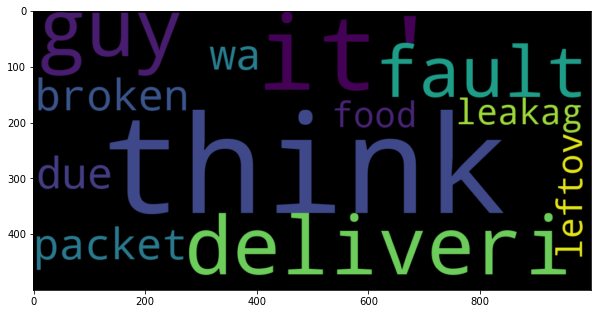

In [382]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[0]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

Word cloud for negative review words

<function matplotlib.pyplot.show(close=None, block=None)>

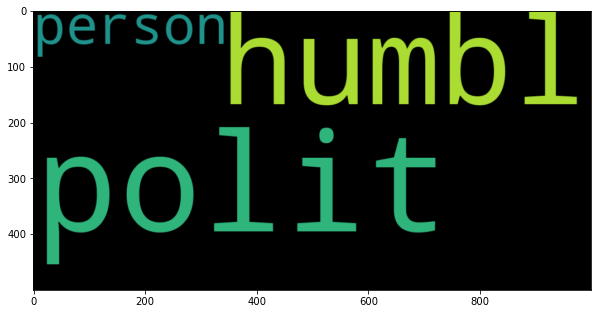

In [216]:
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[115]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show